# PRÁCTICA 4 - REGRESIÓN NO PARAMÉTRICA

Notebook diseñado por Inmaculada Mora, considerando aportaciones de Felipe Alonso.

Fecha de entrega: 22 de Diciembre de 2020 (23.59h), a través de Aula Virtual.

En esta práctica se consideran tres esquemas de regresión no paramética:

- Regresor de los k vecinos más próximos o k-NN
- Árboles de regresión
- Regresor de tipo Perceptrón Multicapa o MLP

Puede ser conveniente instalar PyDotPlus en Anaconda. Para ello, puede abrir un terminal y lanzar la siguiente línea de comando: >>conda install pydotplus

Las indicaciones del material a entregar aparecen identificadas en varios puntos del notebook con la palabra "Entrega". Se puede tratar: 
- de código, que debe incluir en una celda concreta;
- de cuestiones teórico prácticas,a  las que debe responder también en una celda concreta del notebook

In [1]:
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar fichero de observaciones. Elegir una variable de entrada y otra variable de salida al regresor

Continuaremos trabajando en esta práctica con el fichero 'pima_indian_diabetes.csv', del que descartaremos la variable "Outcome" (utilizada hasta la fecha como target de las observaciones para entrenar un modelo de clasificación).  

Inicialmente, diseñaremos regresores con una única variable de entrada y una única variable de salida, ambas de naturaleza numérica (continua). Ello permitirá representar gráficamente la función de regresión aprendida con cada esquema. 

Como variable de entrada, consideraremos la variable glucosa.

Como variable de salida, consideraremos la variable insulina.

Si el estudiante tiene interés en diseñar el regresor con otras variables, debe indicarlo al principio de la entrega de su resolución.



In [2]:
# Leemos lel fichero y extraemos las variables de interés
pima_indians_df = pd.read_csv('pima_indias_prepro.csv')


glucosa = pima_indians_df.iloc[:, 1]
insulina = pima_indians_df.iloc[:, 4]
  

## Entrega

Responda razonadamente a las siguientes cuestiones:

- ¿En qué se diferencia un regresor paramétrico de un regresor no paramétrico?
Un regresor paramétrico

- Para el caso aquí considerado (1 variable de entrada y 1 variable de salida al modelo), discuta sobre la necesidad o no de la normalización de características (de entrada y salida) para cada uno de los esquemas de regresión no paramétricos indicados al inicio de la práctica

Será necesario normalizar las de entradas en Knn y MLP.
No será necesario cuando solo tengamos una variable de entrada.
En árbol no es necesario porque las particiones del arbol se realizan teniendo en cuenta una sola variable de entrada. La normalizacion de la caracteristica de entrada no es necesaria. Si que se hace la particion dependiendo de la diferencia de salidas
En MLP no es necesario normalizar porque solo tenemos una sola variable. Puede ser conveniente hacer la normalizacion cn una sola variable, porque se tienen funciones de activación que saturan y es posible que en funcion de como sean los pesos de la inicializacion de la red, pueden saturar o no si son valores muy grandes entran en saturacion y en realidad si lo hubieramos normalizado no.







Representaciones gráficas

En una misma figura, realizaremos las siguientes representaciones gráficas, etiquetando adecuadamente cada uno de los ejes:
- histograma de la glucosa
- histograma de la insulina
- scatter plot entre las variables glucosa e insulina


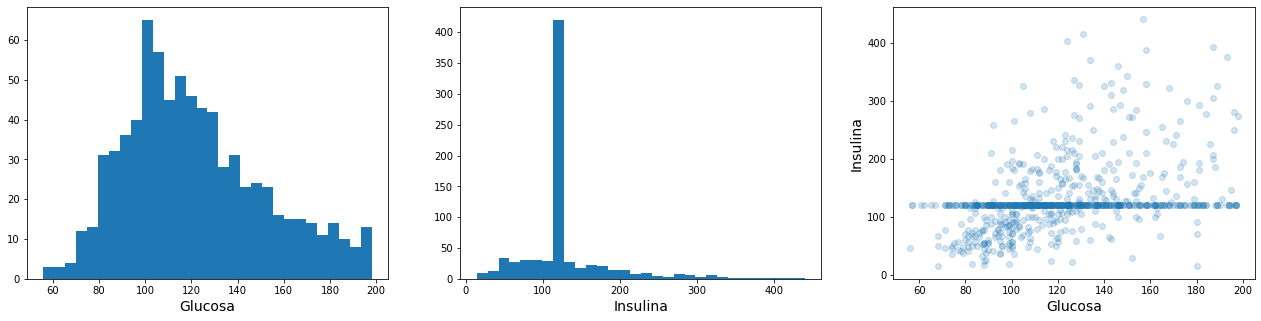

In [3]:
# Representaciones gráficas

plt.figure(figsize=(22,5))

plt.subplot(1,3,1)
plt.hist(glucosa,bins=30)
plt.xlabel('Glucosa',fontsize=14)

plt.subplot(1,3,2)
plt.hist(insulina,bins=30)
plt.xlabel('Insulina',fontsize=14)

plt.subplot(1,3,3)
plt.scatter(glucosa,insulina,alpha=0.2)
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 


plt.show()

#Tercero, scatterplot de la relacion entre la glucosa y insulina para cada individuo

## Entrega

A la vista de las representaciones gráficas, justifique razonadamente:

- ¿Qué tipo de relación (lineal, no lineal) considera que tienen las variables Glucosa e Insulina?
No lineal, porque el conjunto de observaciones no siguen una recta. Tiene forma de exponencial.
- ¿Qué representan los valores nulos en la glucosa? ¿y en la insulina? 
Missing values. 
- Para diseñar un modelo de regresión basado en k-nn, ¿considera necesario normalizar alguna característica? En caso afirmativo, ¿cuál? ¿por qué?

## Entrega

**Si considera que los valores nulos no son adecuados, explique qué podría hacer (y cómo) para no disponer de valores nulos sin reducir el número de ejemplos.**

Se podría en la glucosa imputar por un valor estadistico. Los valores que no son 0 en glucosa y los que si son 8 en insulina, ponerle el valor de insulina que tienen aquellos individuos cn el mismo valor de glucosa. El resto de individuios que tiene 0 en ambas se imputaria por el estadistico media o mediana.

In [4]:
# Código a incluir para abordar la entrega de la celda anterior
# Tratamiento Missing values 


# 2. Regresor k-nn uni-dimensional

En esta sección realizaremos la representación gráfica del modelo de regresión k-nn básico (sin ponderación con la distancia) más adecuado al conjunto de observaciones disponible, estimando dos figuras de mérito (MAE y MSE) sobre un conjunto de test independiente del conjunto de diseño. 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).

Realizaremos la representación gráfica de la función de regresión resultante, superpuesta al scatter plot y para el dominio de la variable independiente representado en el scatter plot anterior.


In [23]:
# Cargamos las librerías necesarias en sklearn 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error  # Figura de mérito 


In [6]:
# 1. Separamos el conjunto de diseño (X_train, y_train) y de test (X_test, y_test): particiones 80/20

X_train, X_test, y_train, y_test = train_test_split(glucosa, insulina, test_size = 0.2, random_state=2)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)


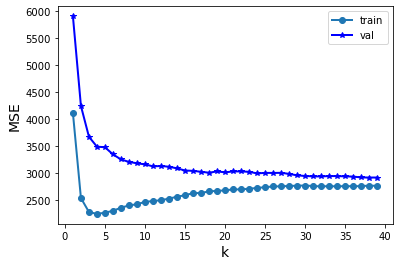

Menor MSE en validación: 2912.714
Mejor valor del hiperparámetro: {'n_neighbors': 39}


In [7]:
# 2. Selección del hiper-parámetro haciendo uso del conjunto de diseño. El criterio de elección es mínimo MSE

param_grid = {'n_neighbors': range(1,40)}
k_grid = np.array(range(1,40))
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3,return_train_score=True)
grid_knn.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

mse_train = -1*np.array(grid_knn.cv_results_['mean_train_score'])
mse_val = -1*np.array(grid_knn.cv_results_['mean_test_score'])


plt.plot(k_grid,mse_train,'-o',label="train", linewidth=2)
plt.plot(k_grid,mse_val,'-*b',label="val", linewidth=2)
plt.xlabel('k',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_knn.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_knn.best_params_))





Paran k=1 hay mucho error, esto se debe a la varianza de los datos que se puede ver en el scatterplot. La dispersion en la variable de insulina para el mimso valor de glucosa hace que el error con un k pequeño sea muy alto.

In [8]:
# Con el valor de k seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
n_neighbors = 15
modelo_knn_regres = KNeighborsRegressor(n_neighbors) 
y_test_estimada = modelo_knn_regres.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)).predict(X_test.values.reshape(-1,1)) # Entrenamos y evaluamos en test


MAE_test_knn_1D = mean_absolute_error(y_test.values.reshape(-1,1), y_test_estimada)
MSE_test_knn_1D = mean_squared_error(y_test.values.reshape(-1,1), y_test_estimada)


print(MAE_test_knn_1D)
print(MSE_test_knn_1D) #unidades al cuadrado

40.21125541125542
3070.4868109668114


<function matplotlib.pyplot.show(close=None, block=None)>

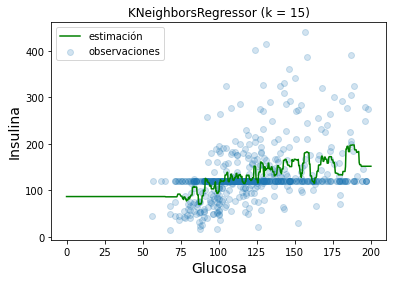

In [9]:
# Con el modelo ya diseñado,  evaluamos una malla unidimensional para realizar la representación de la función de regresión
# creamos la malla T sobre la que evaluar la función de regresión

T = np.linspace(0,200,600)[:, np.newaxis]
y_ = modelo_knn_regres.predict(T) 

# Representamos las estimaciones sobre el subconjunto de diseño
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), alpha=0.2, label='observaciones')
plt.plot(T, y_, c='g', label='estimación')
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))
plt.show 


## Entrega

Explique y justifique razonadamente:

- ¿Cree que habría sido necesario realizar una etapa previa de normalización? En caso afirmativo, ¿qué características habría normalizado?

- ¿Qué tipo de modelo se ha obtenido: un modelo lineal, o no lineal?

- Siguiendo los contenidos presentados en las sesiones teóricas, ¿qué valor del MAE y del MSE se debería haber obtenido para k=1 cuando se evalúa el conjunto de entrenamiento? Intente explicar por qué no se obtiene el resultado esperado 

- De las presentadas en los contenidos teóricos de la asignatura, ¿qué otras figuras de mérito, expresadas en las mismas unidades que la variable de salida, considera adecuado evaluar? Incluya el código y obtenga los valores correspondientes para la partición de test 

- Justifique cómo sería la función de regresión si k=1. Con puntos abruptos. Sobreajuste

- Justifique cómo sería la función de regresión si el valor de k coincidiera con el número de observaciones disponibles. Una constante, subajuste

In [10]:
# Código a incluir para abordar la entrega de la celda anterior




# 3. Árbol de regresión con una variable de entrada

En esta sección realizaremos el diseño la representación gráfica del modelo de regresión k-nn básico (sin ponderación con la distancia) más adecuado al conjunto de observaciones disponible, obteniendo dos figuras de mérito (MAE y MSE) sobre un conjunto de test independiente del conjunto de diseño (el mismo que en la sección anterior). 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).

Realizaremos la representación gráfica de la función de regresión resultante, superpuesta a la función de regresión obtenida con k-nn en el apartado anterior.


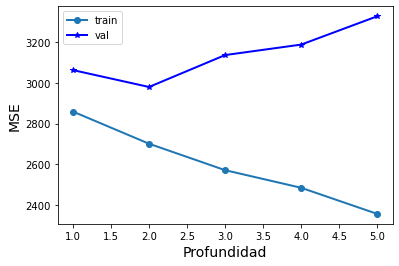

Menor MSE en validación cruzada: 2979.483
Mejor valor del hiperparámetro: {'max_depth': 2}


In [11]:
from sklearn.tree import DecisionTreeRegressor

# Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
param_grid = {'max_depth': range(1,6)}
profundidad_grid = np.array(range(1,6))

grid_arbol = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3,return_train_score=True)
grid_arbol.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

mse_train_arbol = -1*np.array(grid_arbol.cv_results_['mean_train_score'])
mse_val_arbol = -1*np.array(grid_arbol.cv_results_['mean_test_score'])

plt.plot(profundidad_grid,mse_train_arbol,'-o',label="train", linewidth=2)
plt.plot(profundidad_grid,mse_val_arbol,'-*b',label="val", linewidth=2)
plt.xlabel('Profundidad',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación cruzada: {:.3f}".format(-grid_arbol.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_arbol.best_params_))


In [12]:
# Con el valor de máxima profundidad seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Construyo el modelo con los ejemplos de train 
param_max_depth=2
Regresor_Arbol_1D = DecisionTreeRegressor(max_depth=param_max_depth)
Regresor_Arbol_1D.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Represento visualmente el árbol
Nombres_Caract_In = ['Glucose']

dot_data_1 = export_graphviz(Regresor_Arbol_1D,
                           feature_names=Nombres_Caract_In)

graph = graph_from_dot_data(dot_data_1)
graph.write_png('Tree_Glucosa.png')

True

EL arbol de regresion solo tiene 4 valores posibles, por eso el knn tiene una mayor variabilidad

## Entrega

Explique y justifique razonadamente:

- Justifique por qué disminuye el MSE en el conjunto de entrenamiento a medida que aumenta la profundidad del árbol. ¿Considera que seguiría disminuyendo si se exploraran valores de la profundidad aún más altos?

- Visualice el árbol construido e incluya en la entrega la imagen generada. Indique cuántos valores distintos puede ofrecer el modelo. ¿Cómo ha obtenido estos valores? cuatro valores distintos

- ¿Cree que habría sido necesario realizar una etapa previa de normalización? En caso afirmativo, ¿qué características habría normalizado?

- ¿Qué tipo de modelo se ha obtenido: un modelo lineal, o no lineal?

- Represente gráficamente la función de regresión, superpuesta al diagrama de dispersión de puntos y a la función de regresión obtenida con k-nn en el apartado anterior. Comente las principales diferencias entre los regresores diseñados con k-nn y con árboles. Explique por qué la función de regresión obtenida con el árbol es constante a tramos  

- Evalúe el regresor diseñado con el árbol sobre la partición de test. Obtenga los valores para las mismas figuras de mérito que en la sección anterior. Construya una tabla para comparar los resultados

- De las presentadas en los contenidos teóricos de la asignatura, ¿qué otras figuras de mérito, expresadas en las mismas unidades que la variable de salida, considera adecuado evaluar? Incluya el código y obtenga los valores correspondientes para la partición de test, incluyéndolos en la tabla anterior 

- A la vista de los resultados, ¿qué regresor elegiría, el diseñado con k-nn o con árboles? Proporcione valores numéricos en la comparación


In [13]:
# Código a incluir para abordar la entrega de la celda anterior




# 4. Regresor k-nn con dos variables de entrada 

En esta sección diseñará otro modelo de regresión k-nn básico (sin ponderación con la distancia) considerando dos variables de entrada (glucosa e índice de masa corporal). Seleccionaremos el modelo según MSE sobre un conjunto de validación y comparará las prestaciones con los diseños anteriores. 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).



## Entrega

- Realice una representación gráfica del histograma de cada característica. Etiquete adecuadamente los ejes.


- Realice tres scatter plots: glucosa-insulina, BMI-insulina, glucosa-BMI. Etiquete adecuadamente los ejes.


- ¿Qué representan los valores nulos en el BMI? 

- Explique qué podría hacer para no disponer de valores nulos en la variable BMI sin reducir el número de ejemplos. Haga uso de alguna de las técnicas de regresión no paramétricas presentadas en esta práctica para implementar un modelo de imputación del BMI que sólo tenga en cuenta como entrada las 2 características indicadas previamente (glucosa, insulina).  


- Explique y justifique razonadamente si es conveniente (o no) realizar la normalización de las características.
En kNN si influye la normalizacion porque al medir las distancias tienen distinto rando dinamico las caracteristicas. Si fuera mucho mayor una de las variables, predominaria sobre la otra
En árboles no seria necesario normalizar ya que se sigue haciendo las particiones teniendo en cuenta una variable cada vez.


In [14]:
# Código a incluir para abordar la entrega de la celda anterior




## Entrega

- Diseñe un regresor k-nn para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor del parámetro k

- Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores y compare prestaciones




In [15]:
# Código a incluir para abordar la entrega de la celda anterior




# 5. Árboles de regresión con dos variables de entrada

En esta sección se diseñará otro modelo de árbol de regresión considerando dos variables de entrada (glucosa e índice de masa corporal). Seleccionaremos el modelo según MSE sobre un conjunto de validación (3-fold cross validation),  compararando las prestaciones con los diseños anteriores. 





## Entrega


- Explique y justifique razonadamente si es conveniente (o no) realizar la normalización de las características.


- Diseñe un árbol de regresión para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor para la profundidad del árbol


- Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores y compare prestaciones




In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


# Representación gráfica de las tres características, tanto como histograma como con scatter plot


X_all = pima_indians_df[['Glucose', 'BMI']]
Y_all = pima_indians_df['Insulin']



# Selección del modelo
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

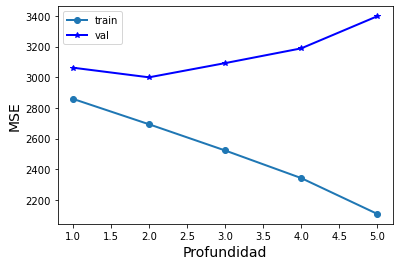

Menor MSE en validación cruzada: 2999.470
Mejor valor del hiperparámetro: {'max_depth': 2}


In [17]:
# Código a incluir para abordar la entrega de la celda anterior
# Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
param_grid = {'max_depth': range(1,6)}
profundidad_grid = np.array(range(1,6))

grid_arbol = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3,return_train_score=True)
grid_arbol.fit(X_train, y_train)

mse_train_arbol = -1*np.array(grid_arbol.cv_results_['mean_train_score'])
mse_val_arbol = -1*np.array(grid_arbol.cv_results_['mean_test_score'])

plt.plot(profundidad_grid,mse_train_arbol,'-o',label="train", linewidth=2)
plt.plot(profundidad_grid,mse_val_arbol,'-*b',label="val", linewidth=2)
plt.xlabel('Profundidad',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación cruzada: {:.3f}".format(-grid_arbol.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_arbol.best_params_))

# 6. Regresor basado en el Perceptrón MultiCapa (2 variables de entrada)  

En esta sección se considera el diseño de un regresor a partir de un MLP con una única capa oculta y funciones de activación de tipo tangente hiperbólica. Las variables de entrada serán glucosa e índice de masa corporal.

Únicamente se explorará como hiperparámetro el número de neuronas ocultas de la capa oculta.


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


# Representación gráfica de las tres características, tanto como histograma como con scatter plot


X_all = pima_indians_df[['Glucose', 'BMI']]
Y_all = pima_indians_df['Insulin']



# Selección del modelo
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)


# Normalización, de tipo estandarización, para cada variable

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)


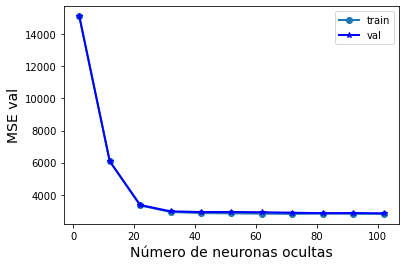

Menor MSE en validación: 2838.706
Mejor valor del hiperparámetro: {'hidden_layer_sizes': 102}


In [19]:
# Configuración del MLP
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

param_grid = {'hidden_layer_sizes': range(2,108,10)} #108 es una barbaridad
neuronas_ocultas_grid = np.array(range(2,108,10))

grid_MLP = GridSearchCV(MLPRegressor(max_iter = 2000, random_state=0, activation='tanh'), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_MLP.fit(X_train_norm, y_train)


mse_MLP_train = -1*np.array(grid_MLP.cv_results_['mean_train_score'])
mse_MLP_val = -1*np.array(grid_MLP.cv_results_['mean_test_score'])


plt.plot(neuronas_ocultas_grid,mse_MLP_train,'-o',label="train", linewidth=2)
plt.plot(neuronas_ocultas_grid,mse_MLP_val,'-*b',label="val", linewidth=2)
plt.xlabel('Número de neuronas ocultas',fontsize=14)
plt.ylabel('MSE val',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_MLP.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_MLP.best_params_))



In [21]:
# Código a incluir para abordar la entrega de la celda anterior

modelo_MLP_regres = MLPRegressor(max_iter = 2000, random_state=0, activation='tanh', hidden_layer_sizes=(30,)) 
y_test_estimada = modelo_MLP_regres.fit(X_train, y_train).predict(X_test) # Entrenamos y evaluamos en test

MAE_test_MLP_2D = mean_absolute_error(y_test, y_test_estimada)
MSE_test_MLP_2D = mean_squared_error(y_test, y_test_estimada)
ME_test_MLP_2D = max_error(y_test, y_test_estimada)
RMSE_test_MLP_2D = mean_squared_error(y_test, y_test_estimada, squared = False)


Tabla4 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores MLP 2D" : [MSE_test_MLP_2D,RMSE_test_MLP_2D,MAE_test_MLP_2D,ME_test_MLP_2D]})
Tabla4

NameError: name 'max_error' is not defined

A medida que va siendo mas complejo el MSE se va reduciendo.
En las mejores prestaciones del parametro corresponden al utlimo valor que hemos comparado, hay que aumentar el rango de neuronas. n_neruonas*n_entradas+1*n_entradas(bias)+n_neuronas*n_salidas+1*n_salidas = 400 w a calcular
Con 600 observacoines no se pueden calcular 400 parametros.
Para seguir explorando el n_neuronas ocultas deberíamos tener muchas mas observaciones para que sea razonable. La grafica no tiene sentido meter numeros tan grandes de neuronas, hay que tener 10 veces mas observaciones. Se deberia parar el aprendizaje sobre 30 neuronas.

## Entrega


- Justifique razonadamente la conveniencia de realizar la normalización de las características de entrada a la red. Discuta sobre la idoneidad de la normalización de la característica de salida.


- Diseñe un MLP con una única capa oculta para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor para el número de neuronas de la capa oculta (hiperparámetro del MLP).

- Teniendo en cuenta la arquitectura del MLP seleccionado, indique cuántos parámetros sería necesario aprender en la red. Teniendo en cuenta que, en general suelen ser necesarios 10 ejemplos de aprendizaje para aprender cada parámetro, ¿cree que dispone de suficientes ejemplos para estimar adecuadamente esos parámetros?


- Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores. Compare prestaciones.


- Justifique, de todos los modelos diseñados, cuál elegiría para estimar la insulina.




In [20]:
# Código a incluir para abordar la entrega de la celda anterior


